### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

In [35]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

![1 and 2.jpg](<attachment:1 and 2.jpg>)
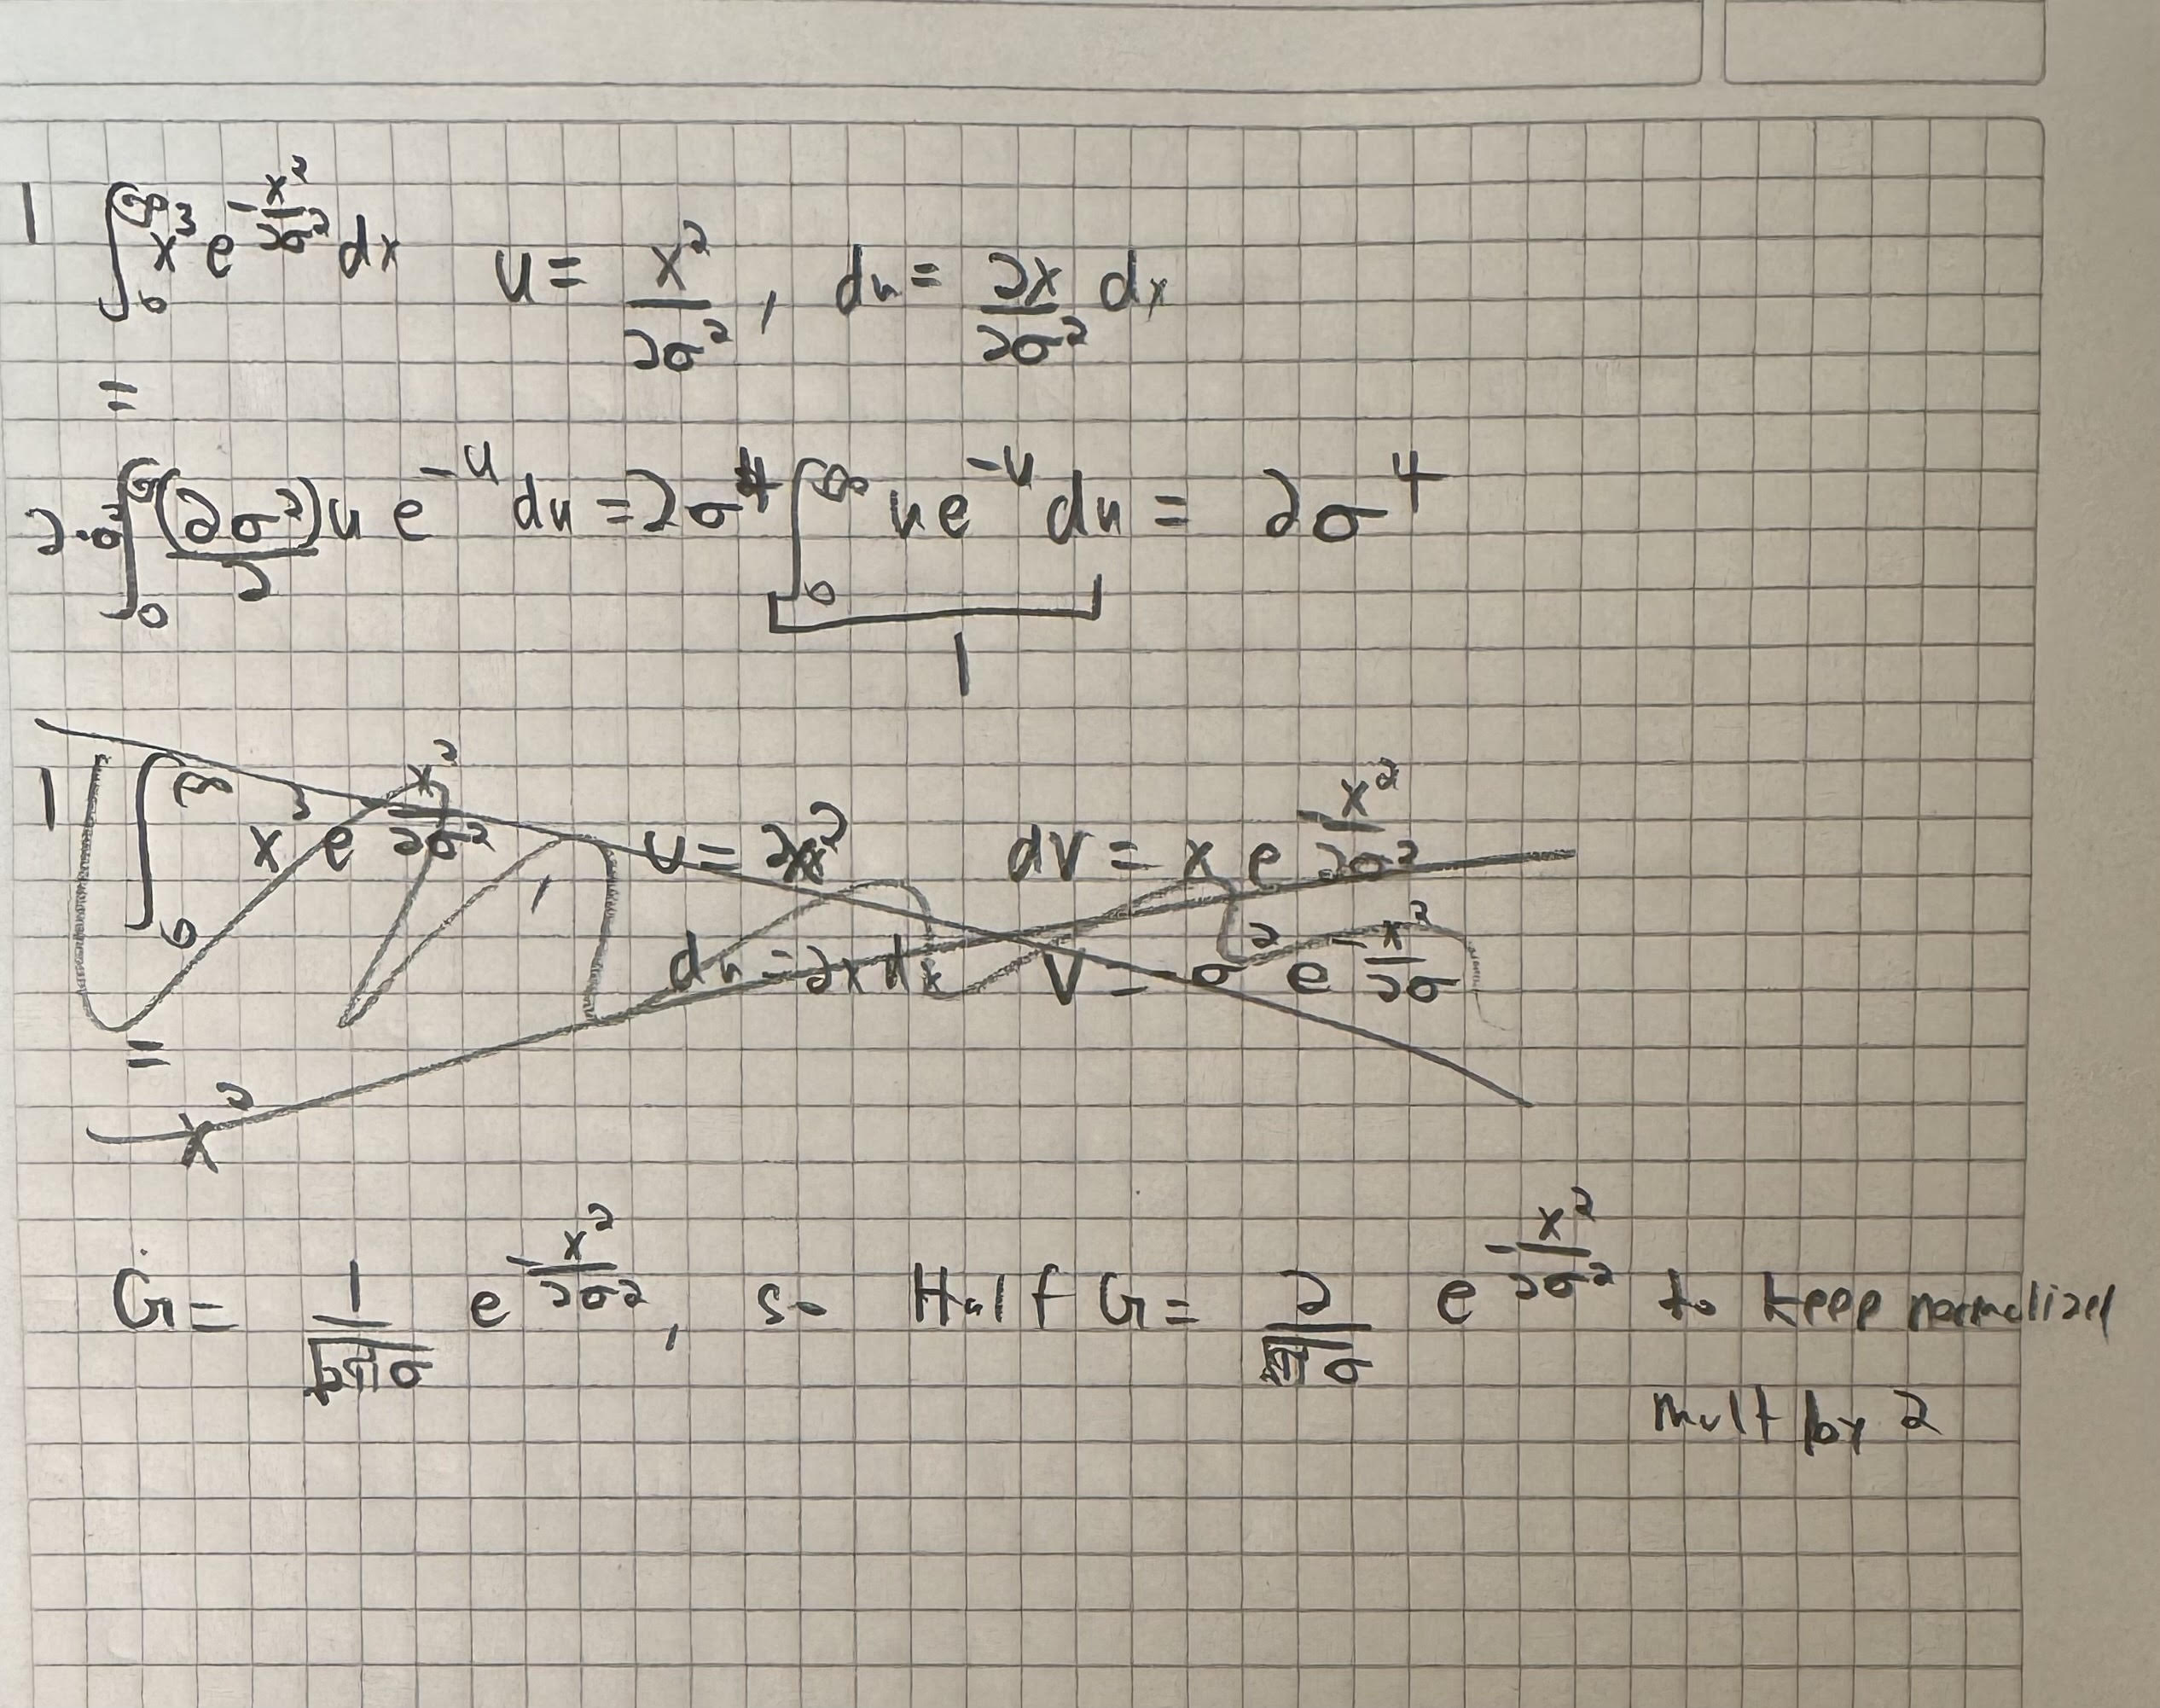

2 is at the bottom of this

In [ ]:
#3
#Note that this is basically a function multiplied by a gaussian distribution, thus you can consider this a value x multiplied by the probability of getting that point x,
#This function should then look like 
integral(x**3 * scipy.halfnorm.pdf(x))
#This is missing a normalization constant though, or moreso an antinormalizing constant which is np.sqrt(np.pi)sigma/2 as determined in 2, thus it looks like below
integral(np.sqrt(np.pi)sigma/np.sqrt(2)*x**3 * scipy.halfnorm.pdf(x))

In [155]:
#4
N = 1000000 # Number Needed
mu = 0 # Mean
sigma = 2 # Stdev
half = scipy.stats.halfnorm(loc = 0, scale = 2) #Found halfnormal gaussian to sample from
rand = half.rvs(N) # Get N samples 
norm = sigma * np.sqrt(np.pi/2) # Since the Integral has to be unnormalized, this function is used
monte=np.sum(rand**3) # The sum
carlo =  norm*monte/len(rand) # Averaging out everything
print('Integral is about:', carlo) 

Integral is about: 32.05252317343136


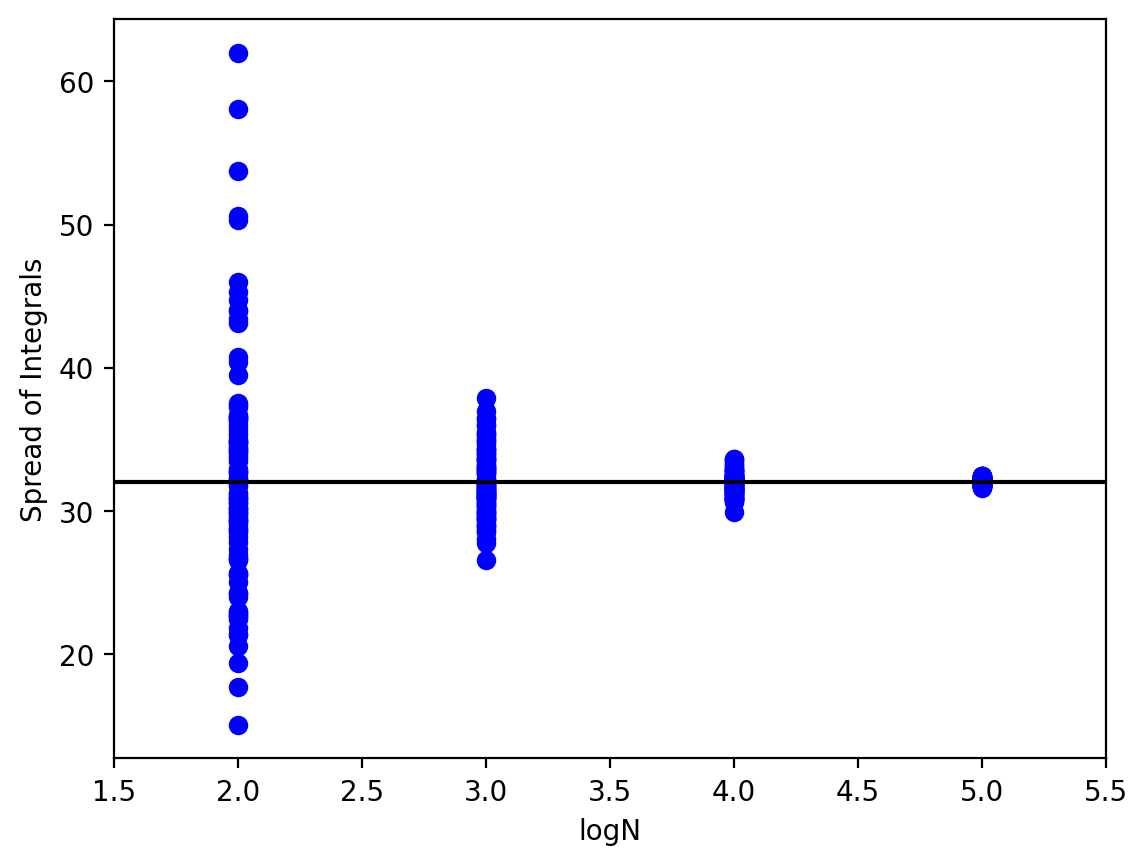

In [163]:
#5 & 6
login = np.linspace(2,5,4) # All relevant powers
mu = 0
sigma = 2
half = scipy.stats.halfnorm(loc = 0, scale = 2)
norm = sigma * np.sqrt(np.pi/2)
np.set_printoptions(legacy='1.25')
plt.xlim(1.5,5.5)
plt.xlabel('logN')
plt.ylabel('Spread of Integrals')
plt.axhline(y=32,color = 'black')
for e in login:
    N = 10**int(e)
    g = 0
    gin = np.linspace(0,99,100)
    while g < 100:
        Coin = []
        rand = half.rvs(N)
        monte=np.sum(rand**3)
        carlo =  norm*monte/len(rand)
        plt.scatter(e,carlo, color = 'blue')
        Coin.append(carlo)
        g +=1
    print(Coin)
    

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

PDF at x = 150 0.00010281859975274035
Random Draws are [106.67450262  87.15378685 117.09405419  76.79541652 106.32921589
  92.09959222 102.37624568 110.11671158 101.48116748 131.02672715]
0.04290603331967846 Is for an IQ ≥ 150
171.3013646322563 And above is one in a million
1000000.0


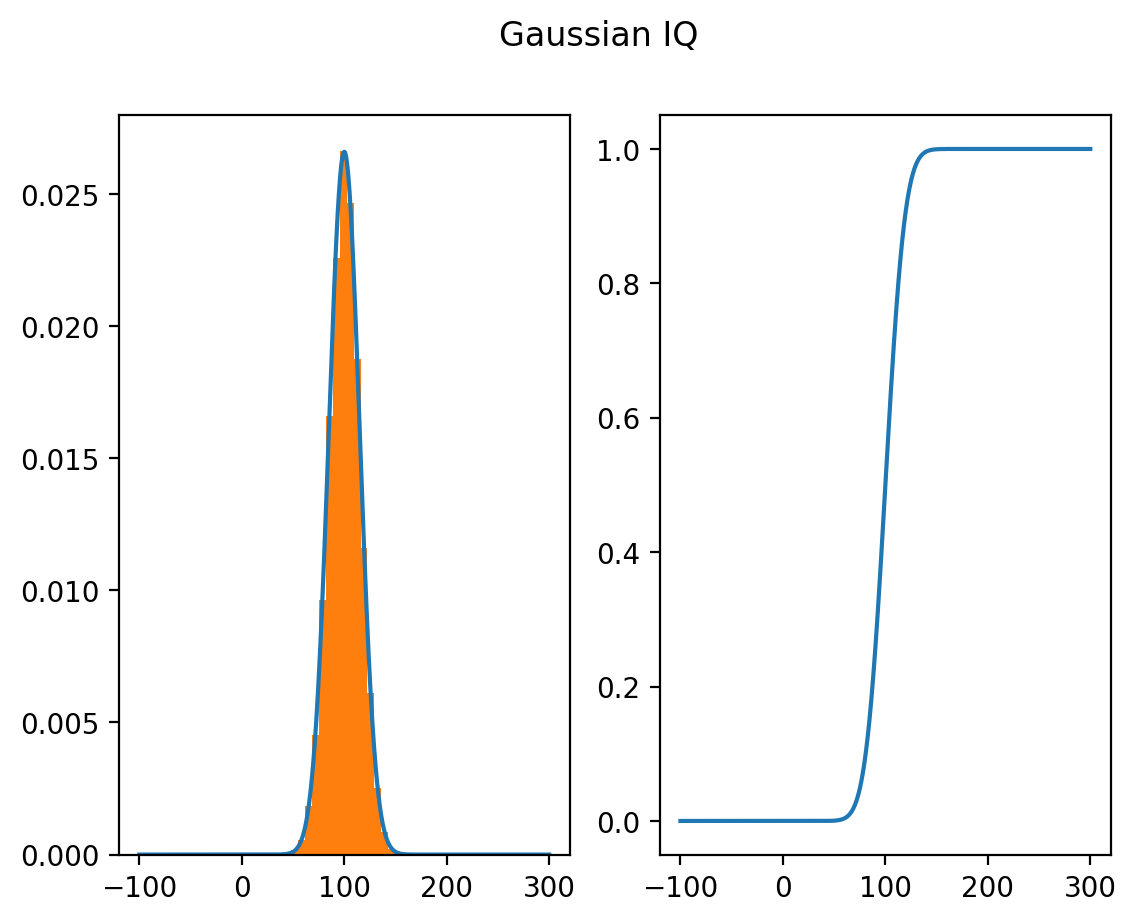

In [177]:
#1
fig,(ax1, ax2) = plt.subplots(1,2) #Create multiple subplots for easier viewing
fig.suptitle('Gaussian IQ')
N = 10 #Draw Size
mus = 100 #Average
sig = 15 #StDev
find = 150 #point of Interest
x = np.linspace(-100,300,2000)
dist = scipy.stats.norm(mus, sig) #Distribution is Created
found = dist.pdf(150)
print('PDF at x = 150',found)
p = dist.pdf(x)
ax1.plot(x,p)
print('Random Draws are',dist.rvs(N))
#2
c = dist.cdf(x)
ax2.plot(x,c)
N = 10**5
rand =dist.rvs(N)
cum=dist.cdf(rand)
prob=dist.ppf(cum)
ax1.hist(prob,20,density=True)
#3
cfind = dist.cdf(find) #Use CDF to find the total probabilty of region up to an IQ of 150
print(100*(1-cfind),'Is for an IQ ≥ 150') # Finds the remaining area and thus remaining probability 
#4
region = scipy.stats.norm.ppf(0.999999, loc = 100, scale = 15) #Use a ppf to find a 1 in a million region 
print(region, 'And above is one in a million')
finder = dist.cdf(region)
print(np.round(1/(1-finder))) #Confirm that this is true

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

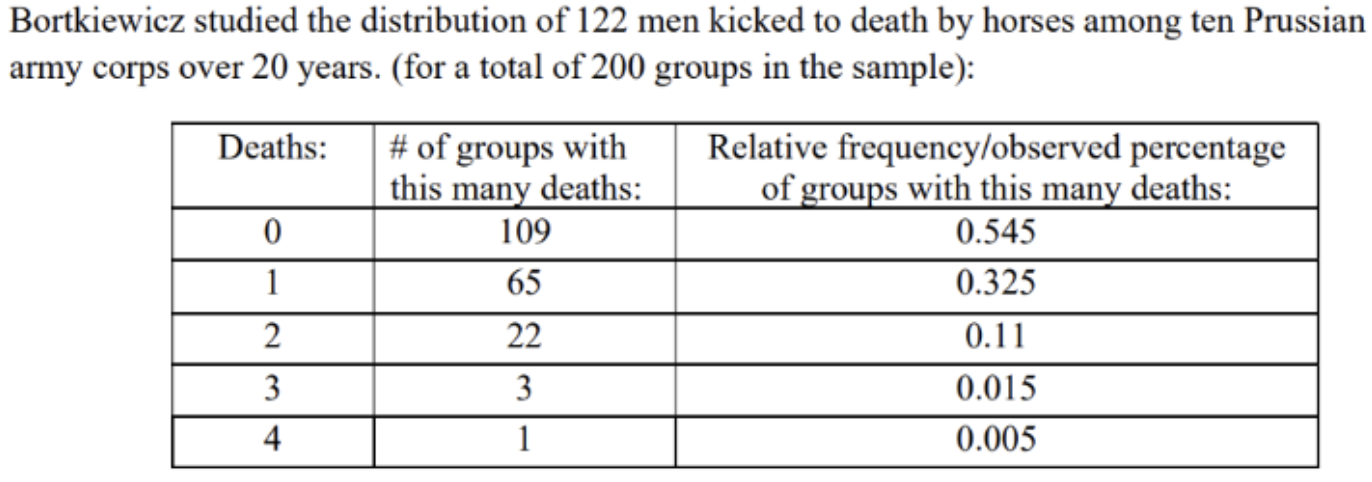

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

<BarContainer object of 5 artists>

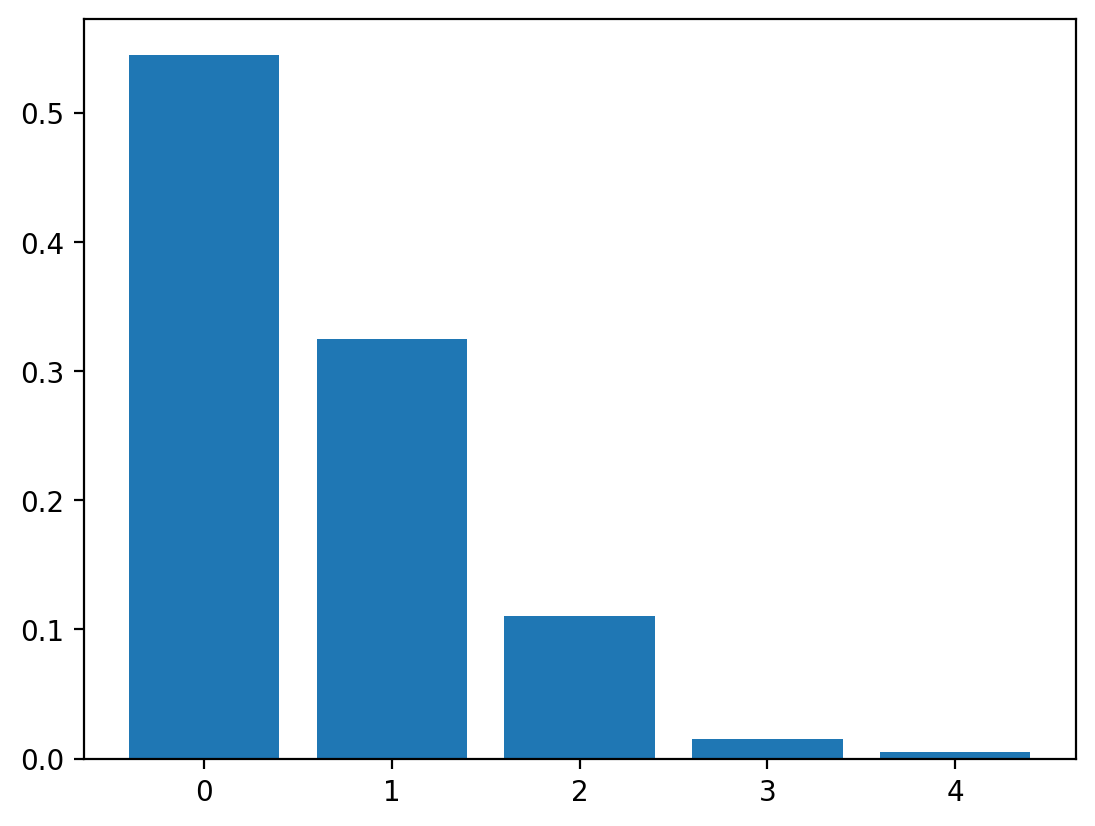

In [102]:
#1
Deaths = [0,1,2,3,4] #Create an Array for deaths
Relative = [0.545,0.325,0.11,0.015,0.005] #Create an Array for Frequency
plt.bar(Deaths,Relative) #Bar Graph for simplicity to show the plot

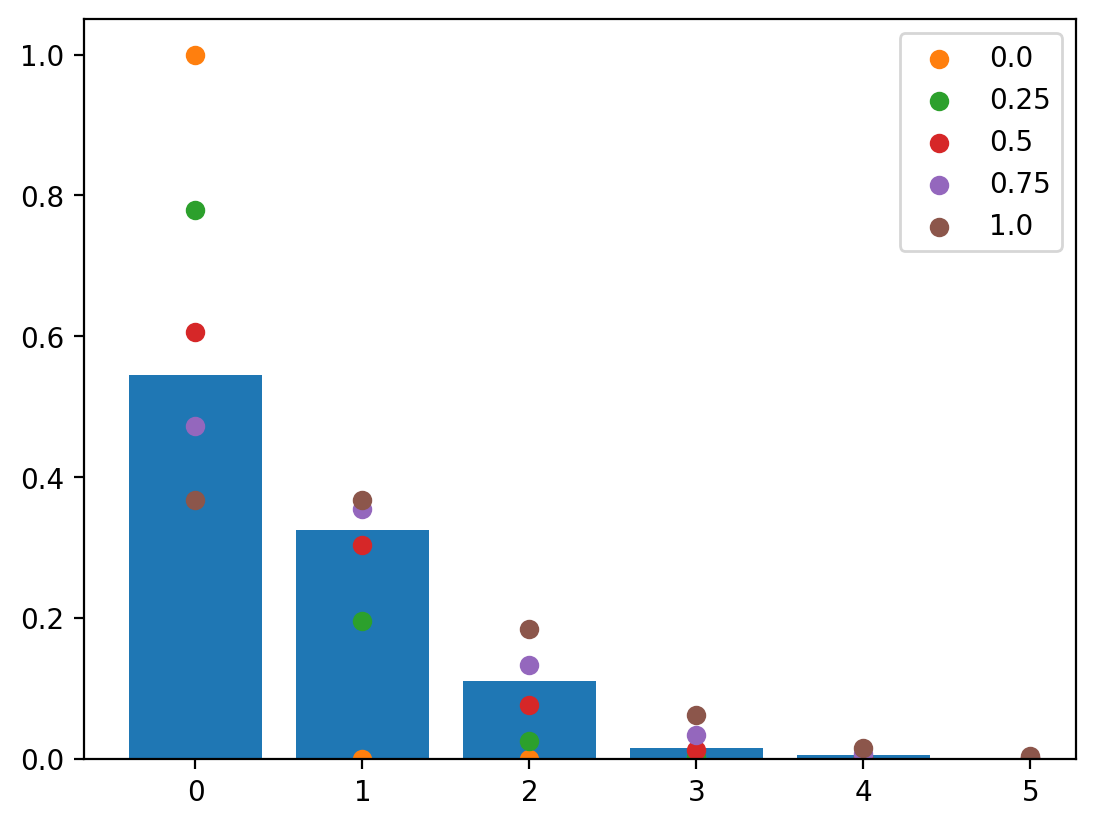

In [194]:
scipy.stats.poisson.rvs(0.5, size=1000)
mu = np.linspace(0,1,5)
plt.bar(Deaths,Relative) #Reference
for m in mu:
    kpts=np.arange(0,6)
    pdist = scipy.stats.poisson(m)
    plots = scipy.stats.poisson.pmf(kpts, m)
    plt.scatter(kpts,plots,label = m)
plt.legend()

In [191]:
#3
truemu = 0*0.545+1*0.325+2*0.11+3*0.015+4*0.005#How mean is calculated 
print('mean is', truemu)
truesig = np.sqrt(truemu)
print('stdev is', truesig)#This is it for poisson dist
trueskew = 1/truesig #1/sig
print('skew is',trueskew)
print('kurtosis is', trueskew)
#Since there are over 100 0's the median in this data set has to be 0
print('median is', 0)
#Since there are a majority 0, the mode is also 0
print('mode is', 0)

mean is 0.6100000000000001
stdev is 0.7810249675906655
skew is 1.2803687993289596
kurtosis is 1.2803687993289596
median is 0
mode is 0


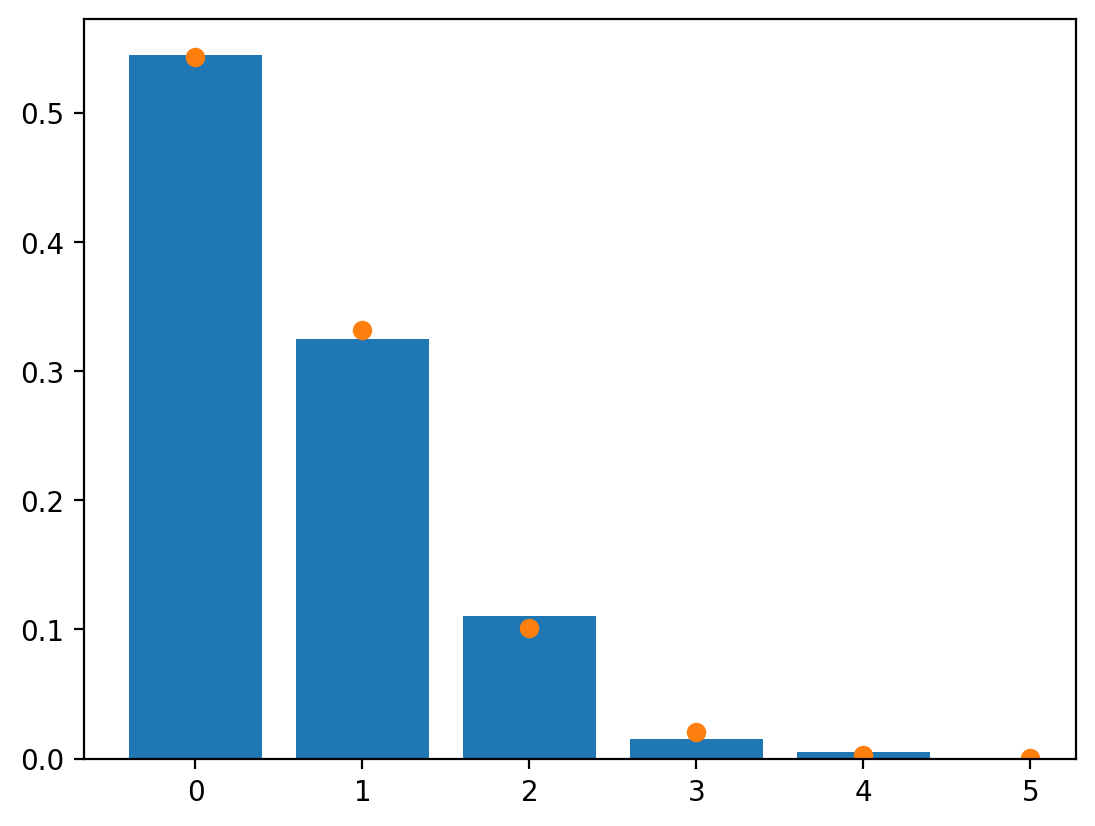

In [192]:
#4 Just plot them on top of each other
plots = scipy.stats.poisson.pmf(kpts, truemu)
plt.bar(Deaths,Relative)
plt.scatter(kpts,plots,)
